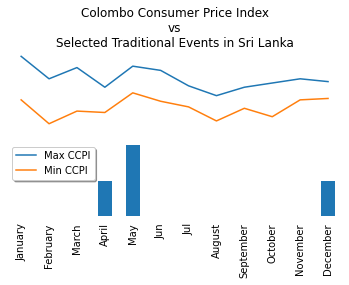

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ccpiAll=pd.read_csv('Colombo Consumer Price Index.csv')
holiday=pd.read_csv('Sri Lanka Holiday.csv')
ccpiAll.columns=['Year','January' , 'February' , 'March' , 'April' , 'May' , 'June' , 'July' , 'August' , 'September' , 'October' , 'November' , 'December']
ccpi=ccpiAll.loc[ccpiAll['Year']>2009].dropna()
ccpi.set_index('Year',inplace=True)

ccpimax=ccpi.max()
ccpimin=ccpi.min()

ccpimaxmin=pd.concat([ccpimax,ccpimin],axis=1)
ccpimaxmin.reset_index(inplace=True)
ccpimaxmin.columns=['Month','Maximum - Last 10 years','Minimum - Last 10 years']
ccpimaxmin.set_index('Month',inplace=True)
selectedlist=['Sinhala & Tamil New Year Day','Id Ul-Fitr','Vesak Full Moon Poya Day','Christmas Day']
holiday['Count']=0
for index in holiday.iterrows():
    for item in selectedlist:
        holiday.loc[holiday['Holiday']==item,'Count']=1
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(6,3))

ax1.title.set_text('Colombo Consumer Price Index\nvs\nSelected Traditional Events in Sri Lanka')

a,b=ax1.plot(ccpimaxmin)
c=ax2=holiday.groupby('Month',sort=False)['Count'].sum().plot.bar(grid=False)
ax1.set(frame_on=False)
ax2.set(frame_on=False)
plt.xticks(rotation=90)
ax1.tick_params(bottom=False,left=False,labelbottom=False,labelleft=False)
ax2.tick_params(bottom=False,left=False,labelbottom=True,labelleft=False)
ax2.xaxis.label.set_visible(False)

ax2.legend((a,b,c),('Max CCPI','Min CCPI','Holiday Selected'), loc='upper left', shadow=True)

plt.savefig('Chart.png',bbox_inches = 'tight')
plt.show()